In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

1797 images, each of 8x8 pixels

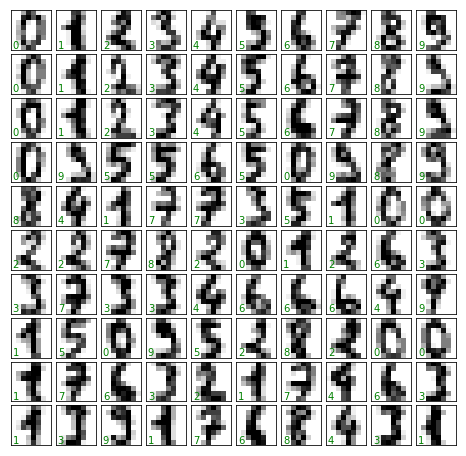

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')


In [7]:
X = digits.data
X.shape

(1797, 64)

In [9]:
y = digits.target
y.shape

(1797,)

Here we can see that there are 1797 samples with 64 features.

# Dimensionality reduction

In [11]:
from sklearn.manifold import Isomap

In [12]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

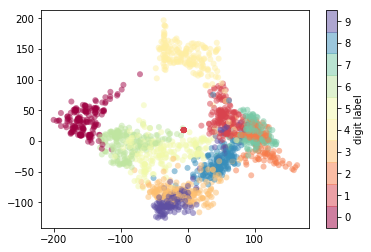

In [17]:
#Now,plot the data having two feature only
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
           edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral',10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

/home/ranjeet/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Text(89.18, 0.5, 'true value')

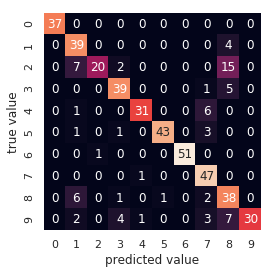

In [23]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

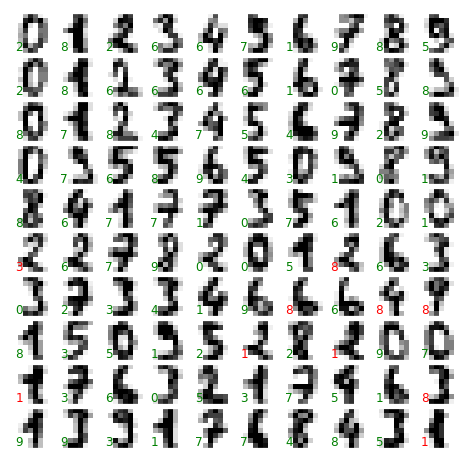

In [24]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')